# Experiments on Italian Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [3]:
df = pd.read_csv('../italian_dataset.csv')
#df = shuffle(df)
#df.reset_index(inplace=True, drop=True)
df.drop('voiceID', inplace = True, axis = 1)
df['label'].value_counts()
df

,meanF0Hz,maxF0Hz,minF0Hz,localJitter,localabsoluteJitter,rapJitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,ddaShimmer,hnr,label
0,157.612529,223.832609,68.338016,0.007651,0.000048,0.003751,0.011254,0.070765,0.652130,0.031894,0.045731,0.095681,16.444860,0
1,125.702970,137.627940,119.652425,0.006869,0.000055,0.003822,0.011466,0.084413,0.889340,0.043123,0.051609,0.129368,14.599892,0
2,162.415428,305.279785,77.756231,0.003867,0.000024,0.002188,0.006563,0.037094,0.346041,0.019231,0.021845,0.057692,18.706091,0
3,209.128449,232.806003,94.472994,0.013749,0.000066,0.007749,0.023247,0.195157,1.698813,0.107110,0.145681,0.321330,9.785874,0
4,196.447580,276.977361,88.749203,0.005496,0.000028,0.003173,0.009518,0.049434,0.547189,0.025140,0.028383,0.075419,21.347341,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,168.440057,183.919696,163.333959,0.003689,0.000022,0.001965,0.005895,0.021701,0.187917,0.011360,0.012718,0.034080,33.506199,1
491,145.069239,150.066907,142.947578,0.001483,0.000010,0.000743,0.002228,0.011682,0.099998,0.006493,0.007300,0.019480,0.763371,1
492,148.338018,151.767444,144.727089,0.004897,0.000033,0.002693,0.008078,0.022827,0.184050,0.012515,0.013418,0.037545,13.672602,1
493,210.594832,218.339095,187.229231,0.001785,0.000008,0.000885,0.002655,0.009076,0.083859,0.002632,0.003565,0.007895,38.485165,1


In [4]:
#separate dependent and independent variable
X = df.iloc[:, :-1]
df_X = df.iloc[:, :-1].values
df_Y = df.iloc[:,-1].values

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.3, random_state = 0)

pd.DataFrame(X_train)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,121.030954,126.603686,115.755086,0.003563,0.000029,0.001596,0.004788,0.046279,0.380901,0.018234,0.027207,0.054701,21.015860
1,182.137007,247.343936,102.324602,0.003254,0.000018,0.001619,0.004857,0.051938,0.507768,0.024841,0.025531,0.074522,27.072949
2,170.658183,177.287386,165.373089,0.004292,0.000025,0.002384,0.007152,0.024236,0.206329,0.011280,0.015172,0.033841,33.385080
3,220.306500,228.131278,153.876697,0.013962,0.000063,0.008250,0.024750,0.147755,1.370156,0.083974,0.106544,0.251921,12.124546
4,131.792670,139.460831,126.725437,0.002273,0.000017,0.001038,0.003113,0.011150,0.102911,0.004468,0.005521,0.013404,33.627941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,128.370676,136.246480,113.186420,0.003189,0.000025,0.001607,0.004821,0.013874,0.128294,0.005683,0.007400,0.017050,23.983647
342,176.774411,190.442017,89.882833,0.002284,0.000013,0.001323,0.003970,0.016926,0.172297,0.008803,0.008992,0.026408,34.230417
343,169.717085,174.011960,134.089197,0.003017,0.000018,0.001514,0.004541,0.059531,0.529055,0.032231,0.037128,0.096694,20.837331
344,164.015281,230.709055,70.424418,0.004720,0.000044,0.002358,0.007075,0.110636,0.953382,0.062372,0.076499,0.187117,14.216876


### Feature scaling

In [5]:
# Scale
#sc = StandardScaler()
sc = MinMaxScaler()
#sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.129107,0.086154,0.252258,0.029157,0.038438,0.022437,0.022437,0.182471,0.181905,0.125176,0.123145,0.125176,0.586119
1,0.358913,0.383864,0.184551,0.025443,0.020079,0.022913,0.022913,0.206806,0.250407,0.175907,0.114991,0.175907,0.717132
2,0.315744,0.211125,0.502401,0.037912,0.031624,0.038853,0.038853,0.087683,0.087644,0.071783,0.064585,0.071783,0.853661
3,0.502459,0.336491,0.444443,0.154127,0.092099,0.161068,0.161068,0.618825,0.716054,0.629960,0.509199,0.629960,0.393803
4,0.169580,0.117856,0.307564,0.013653,0.019097,0.010803,0.010803,0.031414,0.031804,0.019474,0.017622,0.019474,0.858914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.156710,0.109930,0.239309,0.024663,0.031146,0.022660,0.022660,0.043129,0.045509,0.028808,0.026764,0.028808,0.650311
342,0.338745,0.243560,0.121827,0.013785,0.012240,0.016752,0.016752,0.056253,0.069269,0.052759,0.034514,0.052759,0.871946
343,0.312204,0.203049,0.344687,0.022591,0.019929,0.020716,0.020716,0.239456,0.261901,0.232657,0.171423,0.232657,0.582258
344,0.290761,0.342847,0.023730,0.043060,0.061615,0.038318,0.038318,0.459209,0.491016,0.464095,0.362999,0.464095,0.439059


# *****************KNN Experiments******************

## Build model
### without tuning the hyperparameters

In [66]:
###### KNNN ###########
# Fit classifier to the Training set
#KNN
model_knn = KNeighborsClassifier(n_neighbors = 10)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn = ((conf_matrix_knn[0,0] + conf_matrix_knn[1,1])/(conf_matrix_knn[0,0] +conf_matrix_knn[0,1]+conf_matrix_knn[1,0]+conf_matrix_knn[1,1]))*100


print(accuracy_knn)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_knn)

print(conf_matrix_knn)

79.19463087248322
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        61
           1       0.85      0.78      0.82        88

    accuracy                           0.79       149
   macro avg       0.79      0.79      0.79       149
weighted avg       0.80      0.79      0.79       149

0.7936847988077497
[1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1
 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1]
[[49 12]
 [19 69]]


## Hyperparameter tuning for KNN

In [75]:
########Hyperparameter tuning for KNN####################
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,20)) #neighbours must be < number of samples (22)
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

print(conf_matrix_knn_2)

Best leaf_size: 1
Best p: 2
Best n_neighbors: 1
Best Score: 0.8265895953757225
Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'p': [1, 2]}
80.53691275167785
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        61
           1       0.86      0.80      0.83        88

    accuracy                           0.81       149
   macro avg       0.80      0.81      0.80       149
weighted avg       0.81      0.81      0.81       149

0.8075633383010432
[0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Build Model
### using the optimal parameters gotten above

In [78]:
model_knn = KNeighborsClassifier(n_neighbors = 1, p = 2, leaf_size = 1)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn = ((conf_matrix_knn[0,0] + conf_matrix_knn[1,1])/(conf_matrix_knn[0,0] +conf_matrix_knn[0,1]+conf_matrix_knn[1,0]+conf_matrix_knn[1,1]))*100


print(accuracy_knn)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_knn)
print(y_test)
print(conf_matrix_knn)

80.53691275167785
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        61
           1       0.86      0.80      0.83        88

    accuracy                           0.81       149
   macro avg       0.80      0.81      0.80       149
weighted avg       0.81      0.81      0.81       149

0.8075633383010432
[0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1
 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1
 1]
[0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1
 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1
 1]
[[50 11]
 [18 70]]


## Evaluation 


### Evaluation with Leave one out method

In [76]:
df_X = sc.fit_transform(df_X)
k_fold = KFold(n_splits=37)
#KNN
model_knn_kfold = KNeighborsClassifier(n_neighbors = 1, p =2, leaf_size = 1)
y_pred_kfold_knn = cross_val_predict(model_knn_kfold, df_X, df_Y, cv=k_fold)

scores = cross_val_score(model_knn_kfold, df_X, df_Y, scoring='accuracy', cv=k_fold, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

print(df_Y)
print(y_pred_kfold_knn)
conf_matrix_knn_kfold = confusion_matrix(df_Y, y_pred_kfold_knn)
print("Confusion Matrix for KNN using k-fold (leave one out)")
print(conf_matrix_knn_kfold)


accuracy_knn_2 = ((conf_matrix_knn_kfold[0,0] + conf_matrix_knn_kfold[1,1])/(conf_matrix_knn_kfold[0,0] +conf_matrix_knn_kfold[0,1]+conf_matrix_knn_kfold[1,0]+conf_matrix_knn_kfold[1,1]))*100


print(accuracy_knn_2)

Accuracy: 0.832 (0.087)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 

### K Fold Evaluation using optimal paramaters. (k =3)


In [82]:
#df_kfold = shuffle(df)
#df_kfold.reset_index(inplace=True, drop=True)
from sklearn.model_selection import StratifiedKFold
df_kfold = df
df_Xnew = df_kfold.iloc[:, :-1].values
df_Ynew = df_kfold.iloc[:,-1].values


X_kfold = pd.DataFrame(df_Xnew)
y_kfold = pd.DataFrame(df_Ynew)
#print(X_kfold)
#print(y_kfold)

parts = 6
kfold = KFold(parts, True, None) 

# splits into 5 groups 
print("Divided into %s parts." %parts)

k_list = []

for i in range (1,12):
    row = []
    row.append(i)
    total = 0
    #print("Loop", i)
    for train, test in kfold.split(X_kfold,y_kfold):
        #print('\ntrain: %s, test: %s' % (train, test))
        Xtrain_kfold = X_kfold.iloc[train, :]
        Ytrain_kfold = y_kfold.iloc[train, :]
        Xtest_kfold = X_kfold.iloc[test, :]
        Ytest_kfold = y_kfold.iloc[test, :]
        #print(Xtest_kfold)
        #print(Ytest_kfold)
        #print(Ytrain_kfold)

        Xtrain_kfold = sc.fit_transform(Xtrain_kfold)
        Xtest_kfold = sc.transform(Xtest_kfold)

        #modelling
        model_knn_new = KNeighborsClassifier(n_neighbors = 1, p =2, leaf_size = 1)
        model_knn_new.fit(Xtrain_kfold, Ytrain_kfold)
        y_pred_knn_new = model_knn_new.predict(Xtest_kfold)

        conf_matrix_knn_kfold = confusion_matrix(Ytest_kfold, y_pred_knn_new)

        accuracy_knn_kfold = ((conf_matrix_knn_kfold[0,0] + conf_matrix_knn_kfold[1,1])/(conf_matrix_knn_kfold[0,0] +conf_matrix_knn_kfold[0,1]+conf_matrix_knn_kfold[1,0]+conf_matrix_knn_kfold[1,1]))*100

        #print("Confusion Matrix:\n ", conf_matrix_knn_kfold)
        #print("Accuracy ", accuracy_knn_kfold)

        row.append(accuracy_knn_kfold)
        total += accuracy_knn_kfold
    average = row.append(total/parts)
        
    #print(row)
    k_list.append(row)

print("KNN K-fold Evaluation with optimal parameters")
k_list = pd.DataFrame(k_list, columns=['Loops','fold 1','fold 2','fold 3','fold 4','fold 5','fold 6' ,'mean accuracy'])
k_list
    

    
    
    
#print(df.sample(n=7))
#print(df)

#x = df.take(np.random.permutation(len(df))[:4])
#x= df.sample(n=7)
#print(x)
#print(df.drop(x))

#drop_indices = np.random.choice(df.index, 4, replace=False)
#df_subset = df.drop(drop_indices)
#print(drop_indices)
#print(df_subset)

    
    


Divided into 6 parts.


C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A c

KNN K-fold Evaluation with optimal parameters


C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A c

,Loops,fold 1,fold 2,fold 3,fold 4,fold 5,fold 6,mean accuracy
0,1,80.722892,79.518072,80.722892,84.146341,79.268293,85.365854,81.624057
1,2,81.927711,78.313253,79.518072,84.146341,84.146341,84.146341,82.033010
2,3,83.132530,83.132530,85.542169,79.268293,76.829268,84.146341,82.008522
3,4,81.927711,85.542169,84.337349,80.487805,79.268293,81.707317,82.211774
4,5,90.361446,74.698795,80.722892,82.926829,87.804878,79.268293,82.630522
5,6,75.903614,83.132530,87.951807,84.146341,84.146341,76.829268,82.018317
6,7,84.337349,80.722892,81.927711,81.707317,85.365854,86.585366,83.441081
7,8,80.722892,80.722892,81.927711,81.707317,82.926829,85.365854,82.228916
8,9,81.927711,83.132530,80.722892,84.146341,86.585366,78.048780,82.427270
9,10,84.337349,78.313253,79.518072,79.268293,89.024390,84.146341,82.434617



# *****************Decision Tree Experiments***************

## Build model
### without tuning the hyperparameters

79.19463087248322
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        61
           1       0.84      0.80      0.82        88

    accuracy                           0.79       149
   macro avg       0.79      0.79      0.79       149
weighted avg       0.80      0.79      0.79       149

0.7911698956780924
[0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1
 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1
 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1
 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1
 1]
[[48 13]
 [18 70]]


[Text(557.5271186440677, 722.9879999999999, 'X[8] <= 0.109\ngini = 0.497\nsamples = 346\nvalue = [159, 187]'),
 Text(154.6322033898305, 646.884, 'X[7] <= 0.05\ngini = 0.3\nsamples = 147\nvalue = [27, 120]'),
 Text(45.396610169491524, 570.78, 'X[8] <= 0.043\ngini = 0.061\nsamples = 63\nvalue = [2, 61]'),
 Text(22.698305084745762, 494.676, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(68.09491525423729, 494.676, 'X[3] <= 0.014\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(45.396610169491524, 418.57199999999995, 'X[7] <= 0.046\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(22.698305084745762, 342.46799999999996, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(68.09491525423729, 342.46799999999996, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(90.79322033898305, 418.57199999999995, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(263.8677966101695, 570.78, 'X[3] <= 0.019\ngini = 0.418\nsamples = 84\nvalue = [25, 59]'),
 Text(158.88813559322034, 494.676, 'X[12] <

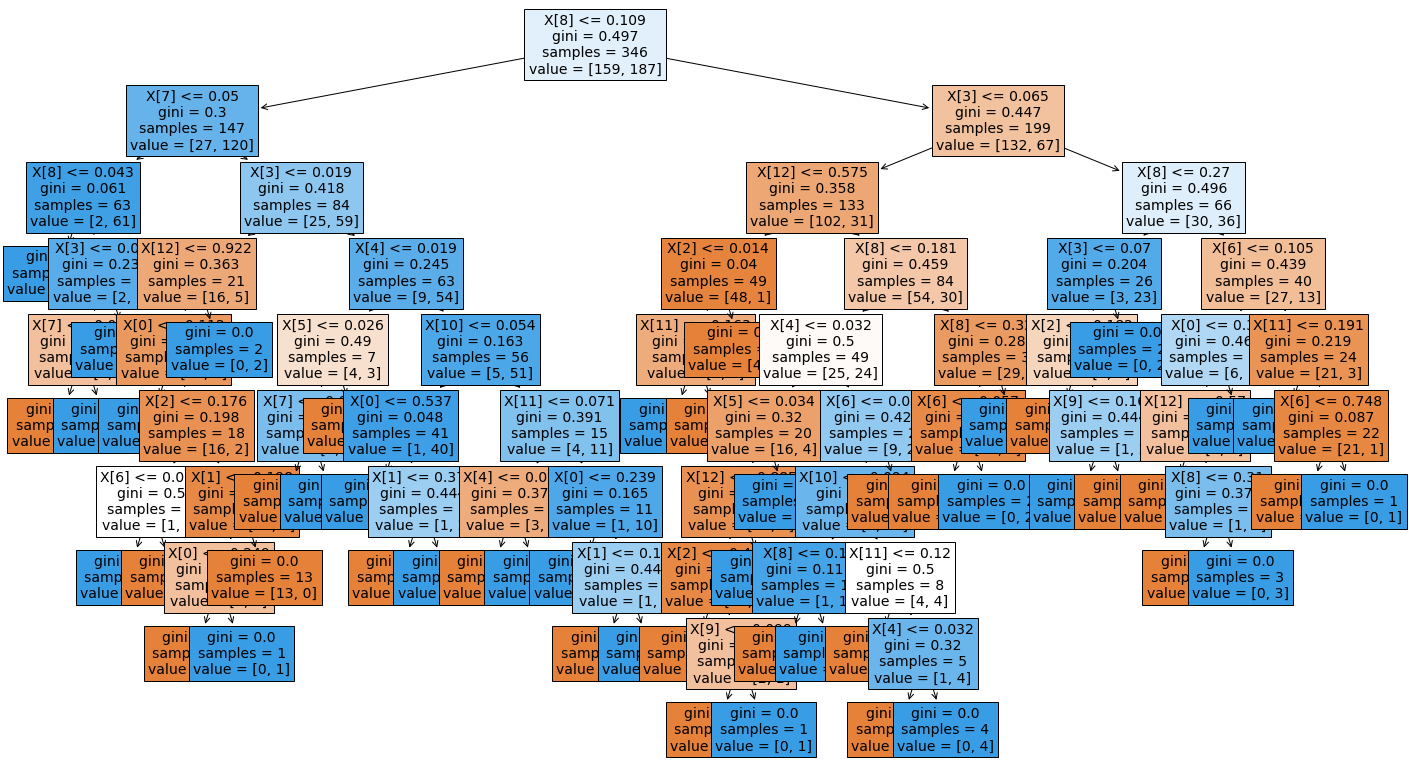

In [83]:
###### KNNN ###########
# Fit classifier to the Training set
#Decision Tree
import matplotlib.pyplot as plt
model_dt = tree.DecisionTreeClassifier()
model_dt = model_dt.fit(X_train, y_train)

y_pred_knn = model_dt.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn = ((conf_matrix_knn[0,0] + conf_matrix_knn[1,1])/(conf_matrix_knn[0,0] +conf_matrix_knn[0,1]+conf_matrix_knn[1,0]+conf_matrix_knn[1,1]))*100


print(accuracy_knn)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_knn)

print(conf_matrix_knn)

plt.figure(figsize=(24,14))
tree.plot_tree(model_dt, filled=True, fontsize=14)

## Hyperparameter tuning for Decision Trees

In [84]:
########Hyperparameter tuning for KNN####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
max_depth = list(range(1,10))
min_samples_split = list(range(2,10)) #neighbours must be < number of samples (22)
min_samples_leaf = list(range(1,5))
criterion=['gini','entropy']
#Convert to dictionary
hyperparameters = dict(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, criterion = criterion)
#Create new KNN object
dt_2 = tree.DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(dt_2, hyperparameters, refit=True)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

print(conf_matrix_knn_2)

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Score: 0.8092485549132948
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4], 'criterion': ['gini', 'entropy']}
81.20805369127517
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        61
           1       0.83      0.85      0.84        88

    accuracy                           0.81       149
   macro avg       0.81      0.80      0.80       149
weighted avg       0.81      0.81      0.81       149

0.8031855439642325
[1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1
 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1
 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1
 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1
 1]
[0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Build Model (Decision Tree)
### using the optimal parameters gotten above

In [86]:
#model_dt = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
model_dt = tree.DecisionTreeClassifier(max_depth = 1, criterion='gini',min_samples_leaf=1, min_samples_split=2 )
model_dt = model_dt.fit(X_train, y_train)

y_pred_dt_2 = best_model.predict(X_test)

conf_matrix_dt_2 = confusion_matrix(y_test, y_pred_dt_2)

accuracy_dt_2 = ((conf_matrix_dt_2[0,0] + conf_matrix_dt_2[1,1])/(conf_matrix_dt_2[0,0] +conf_matrix_dt_2[0,1]+conf_matrix_dt_2[1,0]+conf_matrix_dt_2[1,1]))*100

print(conf_matrix_dt_2)
print(accuracy_dt_2)

[[46 15]
 [13 75]]
81.20805369127517


## Evaluation 


### Evaluation with Leave one out method

In [87]:
df_X = sc.fit_transform(df_X)
k_fold = KFold(n_splits=37)
#KNN
model_dt = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=3 )
#model_dt = tree.DecisionTreeClassifier(max_depth = 1, criterion='gini',min_samples_leaf=1, min_samples_split=2 )
y_pred_kfold_dt = cross_val_predict(model_dt, df_X, df_Y, cv=k_fold)
scores = cross_val_score(model_dt, df_X, df_Y, scoring='accuracy', cv=k_fold, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

print(df_Y)
print(y_pred_kfold_dt)
conf_matrix_dt_kfold = confusion_matrix(df_Y, y_pred_kfold_dt)
print("Confusion Matrix for Dt using k-fold (leave one out)")
print(conf_matrix_dt_kfold)


accuracy_dt_2 = ((conf_matrix_dt_kfold[0,0] + conf_matrix_dt_kfold[1,1])/(conf_matrix_dt_kfold[0,0] +conf_matrix_dt_kfold[0,1]+conf_matrix_dt_kfold[1,0]+conf_matrix_dt_kfold[1,1]))*100


print(accuracy_dt_2)

Accuracy: 0.752 (0.127)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 

### K Fold Evaluation using optimal paramaters. (k =4)


In [90]:
#df_kfold = shuffle(df)
#df_kfold.reset_index(inplace=True, drop=True)
from sklearn.model_selection import StratifiedKFold
df_kfold = df
df_Xnew = df_kfold.iloc[:, :-1].values
df_Ynew = df_kfold.iloc[:,-1].values


X_kfold = pd.DataFrame(df_Xnew)
y_kfold = pd.DataFrame(df_Ynew)
#print(X_kfold)
#print(y_kfold)

parts = 6
kfold = KFold(parts, True, None) 

# splits into 5 groups 
print("Divided into %s parts." %parts)

k_list = []

for i in range (1,12):
    row = []
    row.append(i)
    total = 0
    #print("Loop", i)
    for train, test in kfold.split(X_kfold,y_kfold):
        #print('\ntrain: %s, test: %s' % (train, test))
        Xtrain_kfold = X_kfold.iloc[train, :]
        Ytrain_kfold = y_kfold.iloc[train, :]
        Xtest_kfold = X_kfold.iloc[test, :]
        Ytest_kfold = y_kfold.iloc[test, :]
        #print(Xtest_kfold)
        #print(Ytest_kfold)

        Xtrain_kfold = sc.fit_transform(Xtrain_kfold)
        Xtest_kfold = sc.transform(Xtest_kfold)

        #modelling
        model_dt_new = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
        #model_dt_new = tree.DecisionTreeClassifier(max_depth = 1, criterion='gini',min_samples_leaf=1, min_samples_split=2 )
        model_dt_new.fit(Xtrain_kfold, Ytrain_kfold)
        y_pred_dt_new = model_dt_new.predict(Xtest_kfold)

        conf_matrix_dt_kfold = confusion_matrix(Ytest_kfold, y_pred_dt_new)

        accuracy_dt_kfold = ((conf_matrix_dt_kfold[0,0] + conf_matrix_dt_kfold[1,1])/(conf_matrix_dt_kfold[0,0] +conf_matrix_dt_kfold[0,1]+conf_matrix_dt_kfold[1,0]+conf_matrix_dt_kfold[1,1]))*100

        #print("Confusion Matrix:\n ", conf_matrix_knn_kfold)
        #print("Accuracy ", accuracy_knn_kfold)

        row.append(accuracy_dt_kfold)
        total += accuracy_dt_kfold
    average = row.append(total/parts)
        
    #print(row)
    k_list.append(row)
    
k_list = pd.DataFrame(k_list, columns=['Loops','fold 1','fold 2','fold 3','fold 4','fold 5', 'fold 6','mean accuracy'])
k_list
    

    
    
    
#print(df.sample(n=7))
#print(df)

#x = df.take(np.random.permutation(len(df))[:4])
#x= df.sample(n=7)
#print(x)
#print(df.drop(x))

#drop_indices = np.random.choice(df.index, 4, replace=False)
#df_subset = df.drop(drop_indices)
#print(drop_indices)
#print(df_subset)

    
    


Divided into 6 parts.


,Loops,fold 1,fold 2,fold 3,fold 4,fold 5,fold 6,mean accuracy
0,1,75.903614,77.108434,75.903614,70.731707,81.707317,78.048780,76.567245
1,2,85.542169,74.698795,75.903614,80.487805,69.512195,80.487805,77.772064
2,3,73.493976,72.289157,80.722892,79.268293,79.268293,84.146341,78.198158
3,4,85.542169,72.289157,77.108434,71.951220,81.707317,75.609756,77.368009
4,5,80.722892,72.289157,80.722892,85.365854,74.390244,75.609756,78.183466
5,6,77.108434,78.313253,75.903614,78.048780,75.609756,71.951220,76.155843
6,7,85.542169,74.698795,77.108434,81.707317,80.487805,80.487805,80.005387
7,8,69.879518,81.927711,77.108434,82.926829,76.829268,64.634146,75.550984
8,9,80.722892,83.132530,75.903614,73.170732,78.048780,70.731707,76.951709
9,10,75.903614,75.903614,72.289157,74.390244,81.707317,67.073171,74.544520



# *****************SVM Experiments***************

## Build model
### without tuning the hyperparameters

In [29]:
###### KNNN ###########
# Fit classifier to the Training set
#Decision Tree
import matplotlib.pyplot as plt
model_svm = svm.SVC()
model_svm = model_dt.fit(X_train, y_train)

y_pred_svm = model_dt.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

accuracy_svm = ((conf_matrix_svm[0,0] + conf_matrix_svm[1,1])/(conf_matrix_svm[0,0] +conf_matrix_svm[0,1]+conf_matrix_svm[1,0]+conf_matrix_svm[1,1]))*100


print(accuracy_svm)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_svm))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_svm))

print(y_pred_svm)

print(conf_matrix_svm)


69.12751677852349
              precision    recall  f1-score   support

           0       0.59      0.79      0.68        61
           1       0.81      0.62      0.71        88

    accuracy                           0.69       149
   macro avg       0.70      0.71      0.69       149
weighted avg       0.72      0.69      0.69       149

0.7059426229508197
[1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1
 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1
 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0
 1]
[[48 13]
 [33 55]]


## Hyperparameter tuning for SVM

In [91]:
########Hyperparameter tuning for SVM####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['rbf']

#Convert to dictionary
hyperparameters = dict(C=C, gamma=gamma, kernel=kernel)
#Create new KNN object
svm2 = svm.SVC()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(svm2, hyperparameters, refit=True)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

print(conf_matrix_knn_2)

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Score: 0.861271676300578
Best Hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
88.59060402684564
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        61
           1       0.89      0.92      0.91        88

    accuracy                           0.89       149
   macro avg       0.88      0.88      0.88       149
weighted avg       0.89      0.89      0.89       149

0.8782600596125186
[1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1
 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1
 1]
[0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1
 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1


## Build Model (SVM)
### using the optimal parameters gotten above

In [34]:
model_svm = svm.SVC(C = 100, gamma=1,kernel='rbf')
model_svm = model_svm.fit(X_train, y_train)

y_pred_svm_2 = best_model.predict(X_test)

conf_matrix_svm_2 = confusion_matrix(y_test, y_pred_svm_2)

accuracy_svm_2 = ((conf_matrix_svm_2[0,0] + conf_matrix_svm_2[1,1])/(conf_matrix_svm_2[0,0] +conf_matrix_svm_2[0,1]+conf_matrix_svm_2[1,0]+conf_matrix_svm_2[1,1]))*100

print(conf_matrix_svm_2)
print(accuracy_svm_2)

[[51 10]
 [ 7 81]]
88.59060402684564


## Evaluation (SVM) 


### Evaluation with Leave one out method

In [92]:
df_X = sc.fit_transform(df_X)
k_fold = KFold(n_splits=37)
#KNN
#model_knn_kfold = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
model_svm = svm.SVC(C = 100, gamma=1,kernel='rbf')
y_pred_kfold_svm = cross_val_predict(model_svm, df_X, df_Y, cv=k_fold)
scores = cross_val_score(model_svm, df_X, df_Y, scoring='accuracy', cv=k_fold, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

print(df_Y)
print(y_pred_kfold_knn)
conf_matrix_svm_kfold = confusion_matrix(df_Y, y_pred_kfold_svm)
print("Confusion Matrix for Dt using k-fold (leave one out)")
print(conf_matrix_svm_kfold)


accuracy_svm_2 = ((conf_matrix_svm_kfold[0,0] + conf_matrix_svm_kfold[1,1])/(conf_matrix_svm_kfold[0,0] +conf_matrix_svm_kfold[0,1]+conf_matrix_svm_kfold[1,0]+conf_matrix_svm_kfold[1,1]))*100


print(accuracy_svm_2)

Accuracy: 0.871 (0.113)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 

### K Fold Evaluation using optimal paramaters. (k =4)


In [95]:
#df_kfold = shuffle(df)
#df_kfold.reset_index(inplace=True, drop=True)
from sklearn.model_selection import StratifiedKFold
df_kfold = df
df_Xnew = df_kfold.iloc[:, :-1].values
df_Ynew = df_kfold.iloc[:,-1].values


X_kfold = pd.DataFrame(df_Xnew)
y_kfold = pd.DataFrame(df_Ynew)
#print(X_kfold)
#print(y_kfold)

parts = 6
kfold = KFold(parts, True, None) 

# splits into 5 groups 
print("Divided into %s parts." %parts)

k_list = []

for i in range (1,12):
    row = []
    row.append(i)
    total = 0
    #print("Loop", i)
    for train, test in kfold.split(X_kfold,y_kfold):
        #print('\ntrain: %s, test: %s' % (train, test))
        Xtrain_kfold = X_kfold.iloc[train, :]
        Ytrain_kfold = y_kfold.iloc[train, :]
        Xtest_kfold = X_kfold.iloc[test, :]
        Ytest_kfold = y_kfold.iloc[test, :]
        #print(Xtest_kfold)
        #print(Ytest_kfold)

        Xtrain_kfold = sc.fit_transform(Xtrain_kfold)
        Xtest_kfold = sc.transform(Xtest_kfold)

        #modelling
        #model_knn_new = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
        model_svm_new = svm.SVC(C = 100, gamma=1,kernel='rbf')
        model_svm_new.fit(Xtrain_kfold, Ytrain_kfold)
        y_pred_svm_new = model_svm_new.predict(Xtest_kfold)

        conf_matrix_svm_kfold = confusion_matrix(Ytest_kfold, y_pred_svm_new)

        accuracy_svm_kfold = ((conf_matrix_svm_kfold[0,0] + conf_matrix_svm_kfold[1,1])/(conf_matrix_svm_kfold[0,0] +conf_matrix_svm_kfold[0,1]+conf_matrix_svm_kfold[1,0]+conf_matrix_svm_kfold[1,1]))*100

        #print("Confusion Matrix:\n ", conf_matrix_knn_kfold)
        #print("Accuracy ", accuracy_knn_kfold)

        row.append(accuracy_svm_kfold)
        total += accuracy_svm_kfold
    average = row.append(total/parts)
    #print(row)
    k_list.append(row)
    
k_list = pd.DataFrame(k_list, columns=['Loops','fold 1','fold 2','fold 3','fold 4','fold 5','fold 6', 'mean accuracy'])
k_list
    

    
    
    
#print(df.sample(n=7))
#print(df)

#x = df.take(np.random.permutation(len(df))[:4])
#x= df.sample(n=7)
#print(x)
#print(df.drop(x))

#drop_indices = np.random.choice(df.index, 4, replace=False)
#df_subset = df.drop(drop_indices)
#print(drop_indices)
#print(df_subset)

    
    


Divided into 6 parts.


C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,Loops,fold 1,fold 2,fold 3,fold 4,fold 5,fold 6,mean accuracy
0,1,85.542169,79.518072,89.156627,87.804878,89.024390,91.463415,87.084925
1,2,87.951807,83.132530,89.156627,86.585366,81.707317,90.243902,86.462925
2,3,86.746988,85.542169,95.180723,84.146341,84.146341,89.024390,87.464492
3,4,91.566265,89.156627,87.951807,90.243902,90.243902,79.268293,88.071799
4,5,84.337349,80.722892,86.746988,89.024390,87.804878,84.146341,85.463806
5,6,92.771084,84.337349,84.337349,90.243902,90.243902,84.146341,87.679988
6,7,89.156627,84.337349,91.566265,89.024390,89.024390,86.585366,88.282398
7,8,83.132530,89.156627,87.951807,90.243902,87.804878,84.146341,87.072681
8,9,91.566265,84.337349,87.951807,78.048780,87.804878,89.024390,86.455578
9,10,86.746988,90.361446,84.337349,86.585366,89.024390,87.804878,87.476736


## *Naive Bayes Experiments***

## Build model
### without tuning the hyperparameters

In [6]:
###### NB ###########
# Fit classifier to the Training set
#NB
model_nb = GaussianNB()
model_nb = model_nb.fit(X_train, y_train)


y_pred_nb = model_nb.predict(X_test)

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

accuracy_nb = ((conf_matrix_nb[0,0] + conf_matrix_nb[1,1])/(conf_matrix_nb[0,0] +conf_matrix_nb[0,1]+conf_matrix_nb[1,0]+conf_matrix_nb[1,1]))*100


print(accuracy_nb)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_nb))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_nb))

print(y_pred_nb)

print(conf_matrix_nb)

69.79865771812081
              precision    recall  f1-score   support

           0       0.79      0.36      0.49        61
           1       0.68      0.93      0.78        88

    accuracy                           0.70       149
   macro avg       0.73      0.65      0.64       149
weighted avg       0.72      0.70      0.67       149

0.6462369597615498
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1]
[[22 39]
 [ 6 82]]


In [7]:
#df_kfold = shuffle(df)
#df_kfold.reset_index(inplace=True, drop=True)
from sklearn.model_selection import StratifiedKFold
df_kfold = df
df_Xnew = df_kfold.iloc[:, :-1].values
df_Ynew = df_kfold.iloc[:,-1].values


X_kfold = pd.DataFrame(df_Xnew)
y_kfold = pd.DataFrame(df_Ynew)
#print(X_kfold)
#print(y_kfold)

parts = 4
kfold = KFold(parts, True, None) 

# splits into 5 groups 
print("Divided into %s parts." %parts)

k_list = []

for i in range (1,12):
    row = []
    row.append(i)
    total = 0
    #print("Loop", i)
    for train, test in kfold.split(X_kfold,y_kfold):
        #print('\ntrain: %s, test: %s' % (train, test))
        Xtrain_kfold = X_kfold.iloc[train, :]
        Ytrain_kfold = y_kfold.iloc[train, :]
        Xtest_kfold = X_kfold.iloc[test, :]
        Ytest_kfold = y_kfold.iloc[test, :]
        #print(Xtest_kfold)
        #print(Ytest_kfold)

        Xtrain_kfold = sc.fit_transform(Xtrain_kfold)
        Xtest_kfold = sc.transform(Xtest_kfold)
        

        #modelling
        #model_knn_new = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
        model_nb_new = GaussianNB()
        model_nb_new.fit(Xtrain_kfold, Ytrain_kfold)

        y_pred_nb_new = model_nb_new.predict(Xtest_kfold)

        conf_matrix_nb_kfold = confusion_matrix(Ytest_kfold, y_pred_nb_new)

        accuracy_nb_kfold = ((conf_matrix_nb_kfold[0,0] + conf_matrix_nb_kfold[1,1])/(conf_matrix_nb_kfold[0,0] +conf_matrix_nb_kfold[0,1]+conf_matrix_nb_kfold[1,0]+conf_matrix_nb_kfold[1,1]))*100

        #print("Confusion Matrix:\n ", conf_matrix_knn_kfold)
        #print("Accuracy ", accuracy_knn_kfold)

        row.append(accuracy_nb_kfold)
        total += accuracy_nb_kfold
    average = row.append(total/parts)
    #print(row)
    k_list.append(row)
    
k_list = pd.DataFrame(k_list, columns=['Loops','fold 1','fold 2','fold 3','fold 4', 'mean accuracy'])
print("NB Kfold Evaluation for Italian Dataset")
k_list
    

    
    
    
#print(df.sample(n=7))
#print(df)

#x = df.take(np.random.permutation(len(df))[:4])
#x= df.sample(n=7)
#print(x)
#print(df.drop(x))

#drop_indices = np.random.choice(df.index, 4, replace=False)
#df_subset = df.drop(drop_indices)
#print(drop_indices)
#print(df_subset)

    
    


Divided into 4 parts.


C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

NB Kfold Evaluation for Italian Dataset


C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Loops,fold 1,fold 2,fold 3,fold 4,mean accuracy
0,1,62.096774,69.354839,62.903226,63.414634,64.442368
1,2,61.290323,66.935484,59.677419,75.609756,65.878245
2,3,66.129032,59.677419,66.129032,64.227642,64.040782
3,4,65.322581,66.129032,62.903226,65.853659,65.052124
4,5,66.129032,63.709677,62.903226,68.292683,65.258655
5,6,60.483871,69.354839,66.935484,65.040650,65.453711
6,7,62.903226,58.064516,76.612903,66.666667,66.061828
7,8,58.064516,63.709677,68.548387,72.357724,65.670076
8,9,66.129032,61.290323,62.903226,72.357724,65.670076
9,10,58.064516,65.322581,70.161290,73.170732,66.679780


## *Logistic Regression Experiments***

## Build model
### without tuning the hyperparameters

In [9]:
###### KNNN ###########
# Fit classifier to the Training set
#NB


model_lr = LogisticRegression(random_state=0)
model_lr = model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

accuracy_lr = ((conf_matrix_lr[0,0] + conf_matrix_lr[1,1])/(conf_matrix_lr[0,0] +conf_matrix_lr[0,1]+conf_matrix_lr[1,0]+conf_matrix_lr[1,1]))*100


print(accuracy_lr)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_lr))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_lr))

print(y_pred_lr)

print(conf_matrix_lr)


74.49664429530202
              precision    recall  f1-score   support

           0       0.76      0.56      0.64        61
           1       0.74      0.88      0.80        88

    accuracy                           0.74       149
   macro avg       0.75      0.72      0.72       149
weighted avg       0.75      0.74      0.74       149

0.7161885245901639
[1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1
 1]
[[34 27]
 [11 77]]


C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Hyperparameter tuning for LR

In [15]:
########Hyperparameter tuning for SVM####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

#Convert to dictionary
hyperparameters = dict(solver=solvers,penalty=penalty,C=c_values)
#Create new LR object
model_lr2 = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(model_lr2, hyperparameters, cv=cv)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

print(conf_matrix_knn_2)

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conve

Best Score: 0.7678227360308285
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}
78.52348993288591
              precision    recall  f1-score   support

           0       0.80      0.64      0.71        61
           1       0.78      0.89      0.83        88

    accuracy                           0.79       149
   macro avg       0.79      0.76      0.77       149
weighted avg       0.79      0.79      0.78       149

0.7628539493293591
[1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1
 1]
[0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1
 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
model_lr = LogisticRegression(C= 100, penalty='l2',solver= 'newton-cg')
model_lr = model_lr.fit(X_train, y_train)

y_pred_lr_2 = model_lr.predict(X_test)

conf_matrix_lr_2 = confusion_matrix(y_test, y_pred_lr_2)

accuracy_lr_2 = ((conf_matrix_lr_2[0,0] + conf_matrix_lr_2[1,1])/(conf_matrix_lr_2[0,0] +conf_matrix_lr_2[0,1]+conf_matrix_lr_2[1,0]+conf_matrix_lr_2[1,1]))*100

print(conf_matrix_lr_2)
print(accuracy_lr_2)

[[39 22]
 [10 78]]
78.52348993288591


### K Fold Evaluation using optimal paramaters. (k =4)

In [17]:
#df_kfold = shuffle(df)
#df_kfold.reset_index(inplace=True, drop=True)
from sklearn.model_selection import StratifiedKFold
df_kfold = df
df_Xnew = df_kfold.iloc[:, :-1].values
df_Ynew = df_kfold.iloc[:,-1].values


X_kfold = pd.DataFrame(df_Xnew)
y_kfold = pd.DataFrame(df_Ynew)
#print(X_kfold)
#print(y_kfold)

parts = 4
kfold = KFold(parts, True, None) 

# splits into 5 groups 
print("Divided into %s parts." %parts)

k_list = []

for i in range (1,12):
    row = []
    row.append(i)
    total = 0
    #print("Loop", i)
    for train, test in kfold.split(X_kfold,y_kfold):
        #print('\ntrain: %s, test: %s' % (train, test))
        Xtrain_kfold = X_kfold.iloc[train, :]
        Ytrain_kfold = y_kfold.iloc[train, :]
        Xtest_kfold = X_kfold.iloc[test, :]
        Ytest_kfold = y_kfold.iloc[test, :]
        #print(Xtest_kfold)
        #print(Ytest_kfold)

        Xtrain_kfold = sc.fit_transform(Xtrain_kfold)
        Xtest_kfold = sc.transform(Xtest_kfold)
        

        #modelling
        #model_knn_new = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
        model_nb_new = LogisticRegression(C= 100, penalty='l2',solver= 'newton-cg')
        model_nb_new.fit(Xtrain_kfold, Ytrain_kfold)

        y_pred_nb_new = model_nb_new.predict(Xtest_kfold)

        conf_matrix_nb_kfold = confusion_matrix(Ytest_kfold, y_pred_nb_new)

        accuracy_nb_kfold = ((conf_matrix_nb_kfold[0,0] + conf_matrix_nb_kfold[1,1])/(conf_matrix_nb_kfold[0,0] +conf_matrix_nb_kfold[0,1]+conf_matrix_nb_kfold[1,0]+conf_matrix_nb_kfold[1,1]))*100

        #print("Confusion Matrix:\n ", conf_matrix_knn_kfold)
        #print("Accuracy ", accuracy_knn_kfold)

        row.append(accuracy_nb_kfold)
        total += accuracy_nb_kfold
    average = row.append(total/parts)
    #print(row)
    k_list.append(row)
    
k_list = pd.DataFrame(k_list, columns=['Loops','fold 1','fold 2','fold 3','fold 4', 'mean accuracy'])
print("SVM Kfold Evaluation for Italian Dataset")
k_list
    

    
    
    
#print(df.sample(n=7))
#print(df)

#x = df.take(np.random.permutation(len(df))[:4])
#x= df.sample(n=7)
#print(x)
#print(df.drop(x))

#drop_indices = np.random.choice(df.index, 4, replace=False)
#df_subset = df.drop(drop_indices)
#print(drop_indices)
#print(df_subset)

    
    


Divided into 4 parts.


C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

SVM Kfold Evaluation for Italian Dataset


C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Loops,fold 1,fold 2,fold 3,fold 4,mean accuracy
0,1,79.032258,79.032258,82.258065,78.048780,79.592840
1,2,81.451613,79.032258,81.451613,79.674797,80.402570
2,3,77.419355,85.483871,83.064516,80.487805,81.613887
3,4,79.838710,77.419355,75.806452,78.861789,77.981576
4,5,76.612903,83.064516,75.806452,79.674797,78.789667
5,6,72.580645,81.451613,74.193548,83.739837,77.991411
6,7,80.645161,80.645161,83.064516,77.235772,80.397653
7,8,86.290323,85.483871,69.354839,76.422764,79.387949
8,9,79.838710,82.258065,77.419355,81.300813,80.204236
9,10,77.419355,83.870968,80.645161,83.739837,81.418830


## *Gradient Boosting Experiments***

## Build model
### without tuning the hyperparameters

In [6]:
###### KNNN ###########
# Fit classifier to the Training set
#NB

model_gb = GradientBoostingClassifier(random_state=0)
model_gb = model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

accuracy_gb = ((conf_matrix_gb[0,0] + conf_matrix_gb[1,1])/(conf_matrix_gb[0,0] +conf_matrix_gb[0,1]+conf_matrix_gb[1,0]+conf_matrix_gb[1,1]))*100


print(accuracy_gb)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_gb))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_gb))

print(y_pred_gb)

print(conf_matrix_gb)


83.22147651006712
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        61
           1       0.87      0.84      0.86        88

    accuracy                           0.83       149
   macro avg       0.83      0.83      0.83       149
weighted avg       0.83      0.83      0.83       149

0.8302906110283159
[1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1
 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1
 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1
 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1
 1]
[[50 11]
 [14 74]]


## Hyperparameter tuning for GB

In [7]:
########Hyperparameter tuning for SVM####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200] #[5,50,250,500]
max_depth = [1,3,5,7,9]
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01] #[0.01,0.1,1,10,100] 

#Convert to dictionary
hyperparameters = dict(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate)

#Create new LR object
model_gb2 = GradientBoostingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(model_gb2, hyperparameters, cv=cv)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

print(conf_matrix_knn_2)

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score: 0.8497109826589595
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
{'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200], 'max_depth': [1, 3, 5, 7, 9], 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]}
82.5503355704698
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        61
           1       0.87      0.83      0.85        88

    accuracy                           0.83       149
   macro avg       0.82      0.82      0.82       149
weighted avg       0.83      0.83      0.83       149

0.8246087928464978
[1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1
 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1
 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1
 1]
[0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1
 1 1 1 1 0 1

In [17]:
model_lr = GradientBoostingClassifier(learning_rate= 0.1, max_depth=5,n_estimators=200)

model_lr = model_lr.fit(X_train, y_train)

y_pred_lr_2 = model_lr.predict(X_test)

conf_matrix_lr_2 = confusion_matrix(y_test, y_pred_lr_2)

accuracy_lr_2 = ((conf_matrix_lr_2[0,0] + conf_matrix_lr_2[1,1])/(conf_matrix_lr_2[0,0] +conf_matrix_lr_2[0,1]+conf_matrix_lr_2[1,0]+conf_matrix_lr_2[1,1]))*100

print(conf_matrix_lr_2)
print(accuracy_lr_2)

[[51 10]
 [13 75]]
84.56375838926175


### K Fold Evaluation using optimal paramaters. (k =4)

In [11]:
#df_kfold = shuffle(df)
#df_kfold.reset_index(inplace=True, drop=True)
from sklearn.model_selection import StratifiedKFold
df_kfold = df
df_Xnew = df_kfold.iloc[:, :-1].values
df_Ynew = df_kfold.iloc[:,-1].values


X_kfold = pd.DataFrame(df_Xnew)
y_kfold = pd.DataFrame(df_Ynew)
#print(X_kfold)
#print(y_kfold)

parts = 4
kfold = KFold(parts, True, None) 

# splits into 5 groups 
print("Divided into %s parts." %parts)

k_list = []

for i in range (1,12):
    row = []
    row.append(i)
    total = 0
    #print("Loop", i)
    for train, test in kfold.split(X_kfold,y_kfold):
        #print('\ntrain: %s, test: %s' % (train, test))
        Xtrain_kfold = X_kfold.iloc[train, :]
        Ytrain_kfold = y_kfold.iloc[train, :]
        Xtest_kfold = X_kfold.iloc[test, :]
        Ytest_kfold = y_kfold.iloc[test, :]
        #print(Xtest_kfold)
        #print(Ytest_kfold)

        Xtrain_kfold = sc.fit_transform(Xtrain_kfold)
        Xtest_kfold = sc.transform(Xtest_kfold)
        

        #modelling
        #model_knn_new = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
        #model_nb_new = GradientBoostingClassifier(random_state=0)
        model_nb_new = GradientBoostingClassifier(learning_rate= 0.1, max_depth=5,n_estimators=200)
        model_nb_new.fit(Xtrain_kfold, Ytrain_kfold)

        y_pred_nb_new = model_nb_new.predict(Xtest_kfold)

        conf_matrix_nb_kfold = confusion_matrix(Ytest_kfold, y_pred_nb_new)

        accuracy_nb_kfold = ((conf_matrix_nb_kfold[0,0] + conf_matrix_nb_kfold[1,1])/(conf_matrix_nb_kfold[0,0] +conf_matrix_nb_kfold[0,1]+conf_matrix_nb_kfold[1,0]+conf_matrix_nb_kfold[1,1]))*100

        #print("Confusion Matrix:\n ", conf_matrix_knn_kfold)
        #print("Accuracy ", accuracy_knn_kfold)

        row.append(accuracy_nb_kfold)
        total += accuracy_nb_kfold
    average = row.append(total/parts)
    #print(row)
    k_list.append(row)
    
k_list = pd.DataFrame(k_list, columns=['Loops','fold 1','fold 2','fold 3','fold 4', 'mean accuracy'])
print("SVM Kfold Evaluation for Italian Dataset")
k_list
    

    
    
    
#print(df.sample(n=7))
#print(df)

#x = df.take(np.random.permutation(len(df))[:4])
#x= df.sample(n=7)
#print(x)
#print(df.drop(x))

#drop_indices = np.random.choice(df.index, 4, replace=False)
#df_subset = df.drop(drop_indices)
#print(drop_indices)
#print(df_subset)

    
    


Divided into 4 parts.


C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

SVM Kfold Evaluation for Italian Dataset


,Loops,fold 1,fold 2,fold 3,fold 4,mean accuracy
0,1,87.096774,82.258065,82.258065,87.804878,84.854445
1,2,84.677419,86.290323,85.483871,87.804878,86.064123
2,3,84.677419,85.483871,87.096774,86.991870,86.062484
3,4,82.258065,83.870968,91.129032,80.487805,84.436467
4,5,86.290323,83.870968,87.096774,86.178862,85.859232
5,6,87.903226,83.870968,83.064516,91.869919,86.677157
6,7,86.290323,87.903226,82.258065,86.178862,85.657619
7,8,83.064516,87.096774,83.870968,87.804878,85.459284
8,9,83.064516,87.903226,86.290323,78.048780,83.826711
9,10,85.483871,90.322581,85.483871,81.300813,85.647784


## *Random Forest Experiments***

## Build model
### without tuning the hyperparameters

In [21]:
###### KNNN ###########
# Fit classifier to the Training set
#NB

model_gb = RandomForestClassifier()
model_gb = model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

accuracy_gb = ((conf_matrix_gb[0,0] + conf_matrix_gb[1,1])/(conf_matrix_gb[0,0] +conf_matrix_gb[0,1]+conf_matrix_gb[1,0]+conf_matrix_gb[1,1]))*100


print(accuracy_gb)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_gb))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_gb))

print(y_pred_gb)

print(conf_matrix_gb)


79.19463087248322
              precision    recall  f1-score   support

           0       0.70      0.87      0.77        61
           1       0.89      0.74      0.81        88

    accuracy                           0.79       149
   macro avg       0.79      0.80      0.79       149
weighted avg       0.81      0.79      0.79       149

0.8037444113263785
[0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1
 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1
 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1
 1]
[[53  8]
 [23 65]]


C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Hyperparameter tuning for RF

In [20]:
########Hyperparameter tuning for SVM####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200] #[5,50,250,500]
max_depth = [1,3,5,7,9]
max_features = ['auto', 'sqrt', 'log2'] #[0.01,0.1,1,10,100] 
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,5,10,15]

#Convert to dictionary
hyperparameters = dict(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features, min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf )

#Create new LR object
model_gb2 = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(model_gb2, hyperparameters, cv=10)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

print(conf_matrix_knn_2)

Best Score: 0.8497109826589595
Best Hyperparameters: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
{'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200], 'max_depth': [1, 3, 5, 7, 9], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5, 10, 15]}
86.57718120805369
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        61
           1       0.90      0.86      0.88        88

    accuracy                           0.87       149
   macro avg       0.86      0.87      0.86       149
weighted avg       0.87      0.87      0.87       149

0.8662444113263785
[1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1
 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
model_lr = RandomForestClassifier(n_estimators=100,max_depth=7,max_features='auto', min_samples_split=2,min_samples_leaf=1)

model_lr = model_lr.fit(X_train, y_train)

y_pred_lr_2 = model_lr.predict(X_test)

conf_matrix_lr_2 = confusion_matrix(y_test, y_pred_lr_2)

accuracy_lr_2 = ((conf_matrix_lr_2[0,0] + conf_matrix_lr_2[1,1])/(conf_matrix_lr_2[0,0] +conf_matrix_lr_2[0,1]+conf_matrix_lr_2[1,0]+conf_matrix_lr_2[1,1]))*100

print(conf_matrix_lr_2)
print(accuracy_lr_2)

[[52  9]
 [ 9 79]]
87.91946308724832


### K Fold Evaluation using optimal paramaters. (k =4)

In [26]:
#df_kfold = shuffle(df)
#df_kfold.reset_index(inplace=True, drop=True)
from sklearn.model_selection import StratifiedKFold
df_kfold = df
df_Xnew = df_kfold.iloc[:, :-1].values
df_Ynew = df_kfold.iloc[:,-1].values


X_kfold = pd.DataFrame(df_Xnew)
y_kfold = pd.DataFrame(df_Ynew)
#print(X_kfold)
#print(y_kfold)

parts = 4
kfold = KFold(parts, True, None) 

# splits into 5 groups 
print("Divided into %s parts." %parts)

k_list = []

for i in range (1,12):
    row = []
    row.append(i)
    total = 0
    #print("Loop", i)
    for train, test in kfold.split(X_kfold,y_kfold):
        #print('\ntrain: %s, test: %s' % (train, test))
        Xtrain_kfold = X_kfold.iloc[train, :]
        Ytrain_kfold = y_kfold.iloc[train, :]
        Xtest_kfold = X_kfold.iloc[test, :]
        Ytest_kfold = y_kfold.iloc[test, :]
        #print(Xtest_kfold)
        #print(Ytest_kfold)

        Xtrain_kfold = sc.fit_transform(Xtrain_kfold)
        Xtest_kfold = sc.transform(Xtest_kfold)
        

        #modelling
        #model_knn_new = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
        #model_nb_new = GradientBoostingClassifier(random_state=0)
        model_nb_new = RandomForestClassifier(n_estimators=100,max_depth=7,max_features='auto', min_samples_split=2,min_samples_leaf=1)
        model_nb_new.fit(Xtrain_kfold, Ytrain_kfold)

        y_pred_nb_new = model_nb_new.predict(Xtest_kfold)

        conf_matrix_nb_kfold = confusion_matrix(Ytest_kfold, y_pred_nb_new)

        accuracy_nb_kfold = ((conf_matrix_nb_kfold[0,0] + conf_matrix_nb_kfold[1,1])/(conf_matrix_nb_kfold[0,0] +conf_matrix_nb_kfold[0,1]+conf_matrix_nb_kfold[1,0]+conf_matrix_nb_kfold[1,1]))*100

        #print("Confusion Matrix:\n ", conf_matrix_knn_kfold)
        #print("Accuracy ", accuracy_knn_kfold)

        row.append(accuracy_nb_kfold)
        total += accuracy_nb_kfold
    average = row.append(total/parts)
    #print(row)
    k_list.append(row)
    
k_list = pd.DataFrame(k_list, columns=['Loops','fold 1','fold 2','fold 3','fold 4', 'mean accuracy'])
print("SVM Kfold Evaluation for Italian Dataset")
k_list
    

    
    
    
#print(df.sample(n=7))
#print(df)

#x = df.take(np.random.permutation(len(df))[:4])
#x= df.sample(n=7)
#print(x)
#print(df.drop(x))

#drop_indices = np.random.choice(df.index, 4, replace=False)
#df_subset = df.drop(drop_indices)
#print(drop_indices)
#print(df_subset)

    
    


Divided into 4 parts.


C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A colum

C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A colum

SVM Kfold Evaluation for Italian Dataset


,Loops,fold 1,fold 2,fold 3,fold 4,mean accuracy
0,1,79.838710,88.709677,86.290323,80.487805,83.831629
1,2,87.096774,87.903226,79.838710,78.861789,83.425125
2,3,83.870968,83.064516,87.096774,82.926829,84.239772
3,4,86.290323,87.903226,79.838710,82.926829,84.239772
4,5,87.096774,80.645161,88.709677,79.674797,84.031602
5,6,80.645161,82.258065,82.258065,86.991870,83.038290
6,7,79.032258,87.096774,83.870968,83.739837,83.434959
7,8,87.096774,83.064516,81.451613,82.113821,83.431681
8,9,83.870968,84.677419,83.870968,83.739837,84.039798
9,10,83.064516,87.903226,82.258065,82.113821,83.834907
